
# Project: Titanic Survival prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Classification Models</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set is provided by [Kaggle](https://www.kaggle.com/c/titanic) popular competition

>The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

>In this challenge, the Challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

>The Dataset is divided into two files:

The `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Description
#### Variable	Definition	Key
| Column name   | Desc         |
|:------------- |:-------------| 
| __survival__  | Numerical,Survival	0 = No, 1 = Yes    | 
| **pclass**    | Numerical, Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
| **sex**       | Nominal - Female or Male     |
|**Age** |Numerical -Age in years|
|**sibsp**|Numerical, # of siblings / spouses aboard the Titanic|
|**parch**|Numerical, # of parents / children aboard the Titanic,Some children travelled only with a nanny, therefore parch=0 for them.|
|**ticket**|String - Ticket number	|
|**fare**|Numerical, Passenger fare	|
|**cabin**|String,	Cabin number	|
|**embarked**|String, Port of Embarkation[C = Cherbourg, Q = Queenstown, S = Southampton]|


In [2]:
#Loading Data Set
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [3]:
print(df_train.shape)
df_train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.duplicated().any()

False

In [9]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
round(df_train.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elias, Mr. Tannous",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
#identifying variables of binany or more classes
df_uniq = df_train.nunique().to_frame()
df_uniq

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


<a id='wrangling'></a>
## Data Wrangling

### General Properties

### The structure of your dataset?

> This train dataset contains 891 observations and 12 columns, structure : numeric (7), object(5)

### The main feature(s) of interest in your dataset?

> Age, Gender, Pclass, SibSp, Parch columns 



### Data Cleaning

- Age column to be imputed by Median 
- Cabin column is missing most of the values, so will be dropped
- Drop passingerid, name, ticket and fare
- Impute Embarked column with the common value, check for null values for whole df.
- Change Embarked and Sex columns into encoded values

In [3]:
#make a copy of the original df
df_train_c = df_train.copy()

In [4]:
#Dropping unnecessary columns
df_train_c = df_train_c.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

In [5]:
#Check
df_train_c

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [6]:
#imputing Age column with median value
impute_value = df_train_c['Age'].median()
df_train_c['Age'] = df_train_c['Age'].fillna(impute_value)

In [7]:
#Check 
df_train_c.Age.isna().any()

False

In [8]:
#checking most common values in Emparked
df_train_c.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
common_value = 'S'
df_train_c['Embarked']=df_train_c['Embarked'].fillna(common_value)
df_train_c.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df_train_c.isna().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What sort of People Survived the Titanic?)

## Univariate Exploration


In [18]:
#stats for Age variable
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(13.683, 26.947]    0.278339
(26.947, 40.21]     0.274972
(40.21, 53.473]     0.112233
(0.339, 13.683]     0.079686
(53.473, 66.737]    0.048260
(66.737, 80.0]      0.007856
Name: Age, dtype: float64


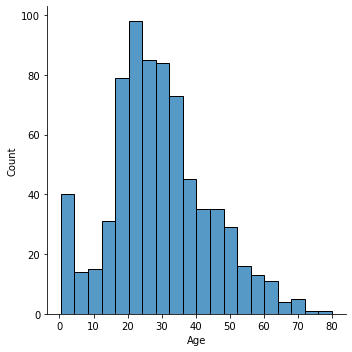

In [16]:
#plotting A histogram for age column
sb.displot(data=df_train, x='Age');
print(df_train.Age.value_counts(bins=6, normalize=True))

> More than 55% of people on the ship are of young age (<40 years old), the age variable has outliers and is slightly skewed to the right. 

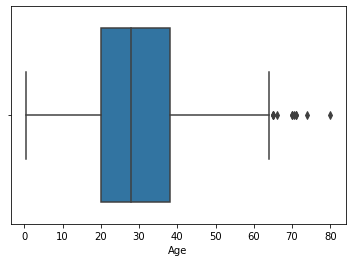

In [17]:
sb.boxplot(data=df_train, x='Age');

0    0.616162
1    0.383838
Name: Survived, dtype: float64


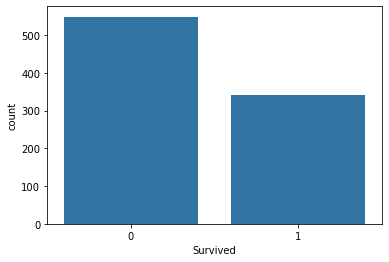

In [91]:
# How many people Survived 
color = sb.color_palette()[0]
sb.countplot(x ='Survived', data = df_train, color=color)
print(df_train.Survived.value_counts(normalize=True))

> This Data (train Data set) only contains a portion of the data, we already know that only 722 survived out of 2224 (~33 % Survival rate)

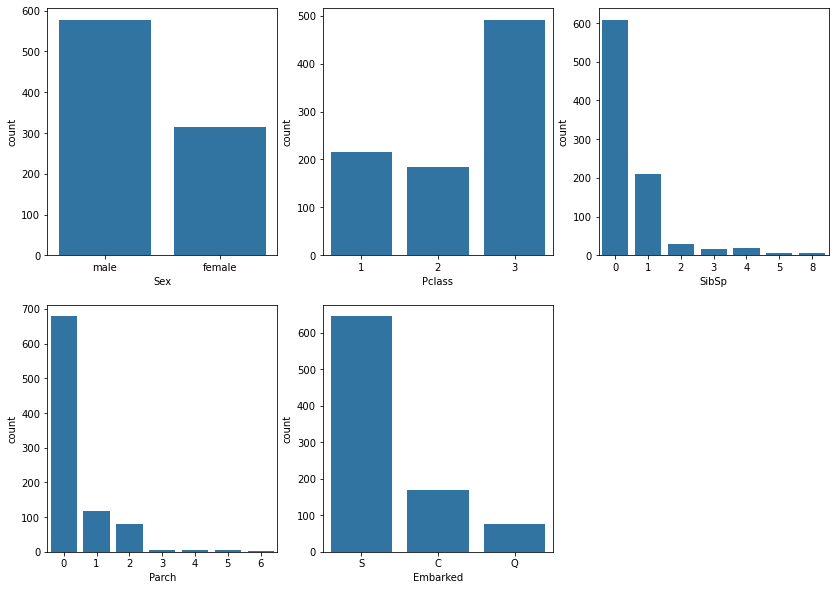

In [92]:
#plotting single plots of different variables 
import warnings
warnings.simplefilter('ignore')
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in cols:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sb.countplot(df_train[i], color=color)
    c = c + 1
plt.show()

> Most of the passengers are males,
> The dominant Pclass among passengers were from 3rd class, then 2nd and 1st class.
> Southampton is most common port of Embarkation,
> Most of the passengers were singles not a parent or children

## Bivariate Exploration & Multivariate Exploration


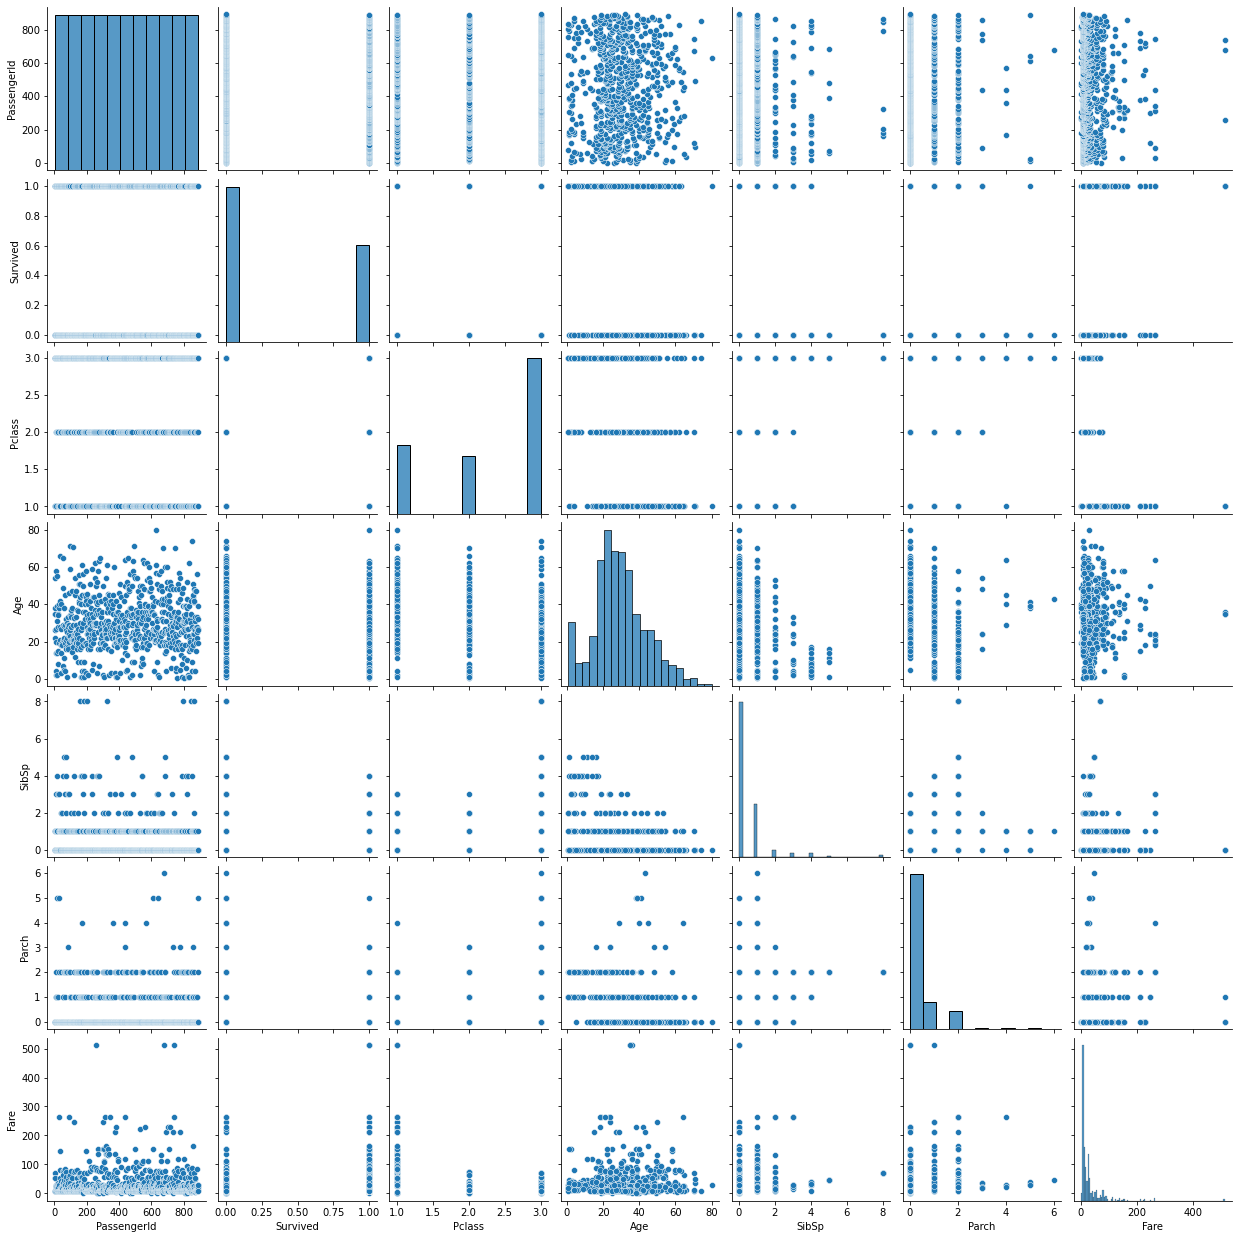

In [34]:
#plotting a pair plot for all numerical variables
sb.pairplot(df_train);

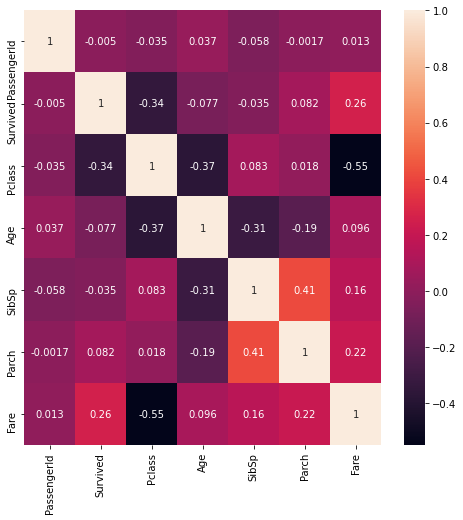

In [9]:
#plotting a Seaborn heatmap for correlations between numerical variables
x = df_train.select_dtypes(exclude='object')
plt.figure(figsize=(8,8))
sb.heatmap(x.corr(), annot=True, fmt='.2g');

> So there's a strong -ve relationship between Fare and Pclass, Fare vs Survived have a moderate +ve relationship. 

In [45]:
y= df_train_c.Survived
fields = list(df_train.columns[:-1])
correlations = df_train[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
dtype: float64

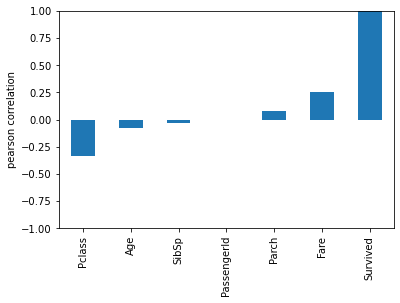

In [47]:
ax = correlations.plot(kind='bar', color=sb.color_palette()[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

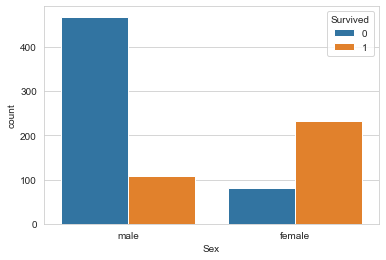

In [92]:
#plotting gender vs survival
sb.countplot(data=df_train, x='Sex', hue='Survived');

In [93]:
df_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

> Most Survivals are among the females of 74% and 18% for males

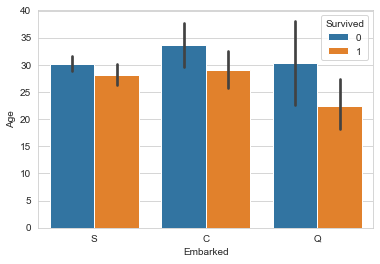

In [84]:
#plotting a bar plot for Age of the survived and where they embarked
sb.set_style('whitegrid')
sb.barplot(data=df_train,y='Age', x='Embarked', hue='Survived');

> Survived passengers are from the young age, who embarked from Cherbourg, then Southampton

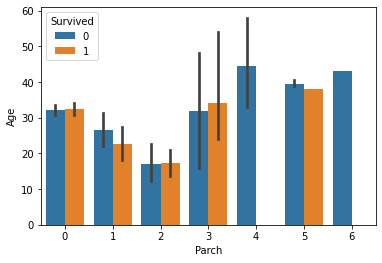

In [73]:
#plotting a bar plot for Age of the survived and whether they were parents 
sb.barplot(data=df_train,y='Age', x='Parch', hue='Survived');

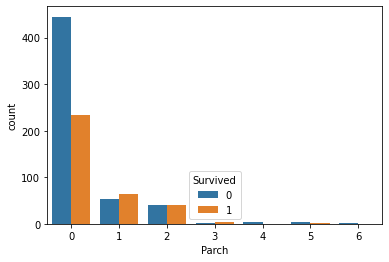

In [83]:
#plotting a countplot forthe survived and whether they were parents 
sb.countplot(data=df_train, x='Parch', hue='Survived');

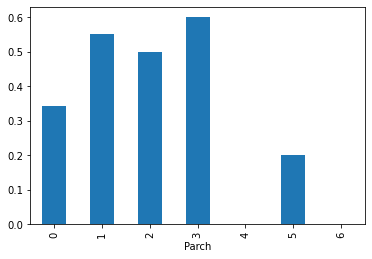

In [86]:
df_train.groupby('Parch')['Survived'].mean().plot(kind='bar');

> Parents with one or more child were more likely to survive

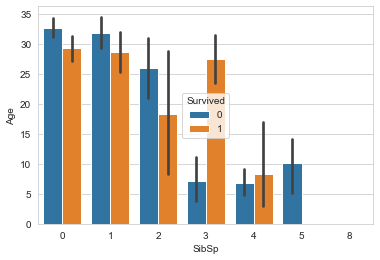

In [87]:
#plotting a bar plot for Age of the survived vs Siblings and spouses
sb.barplot(data=df_train,y='Age', x='SibSp', hue='Survived');

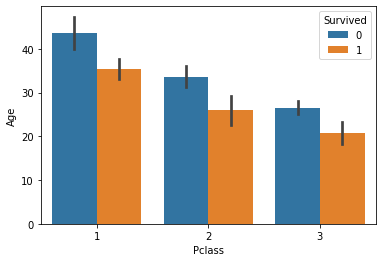

In [75]:
#plotting a bar plot for Age of the survived and their classes
sb.barplot(data=df_train,y='Age', x='Pclass', hue='Survived');

> Young Passengers from the 1st class were the most survivals, then 2nd class and lastly the 3rd class

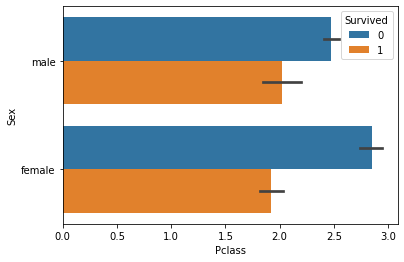

In [79]:
#plotting a bar plot for Sex of the survived and where they embarked
sb.barplot(data=df_train,y='Sex', x='Pclass', hue='Survived');

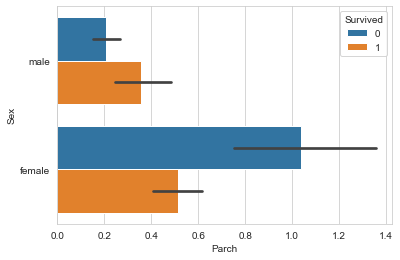

In [89]:
sb.barplot(data=df_train,y='Sex', x='Parch', hue='Survived');

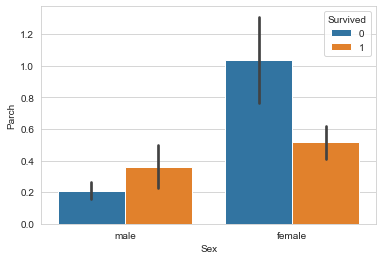

In [88]:
#plotting a bar plot for sex of the survived and Parent/Children
sb.barplot(data=df_train,x='Sex', y='Parch', hue='Survived');

In [87]:
df_train.groupby(['Sex','Parch'])['Survived'].agg(['mean', 'count'])

mean  count
Sex    Parch                 
female 0      0.788660    194
       1      0.766667     60
       2      0.612245     49
       3      0.750000      4
       4      0.000000      2
       5      0.250000      4
       6      0.000000      1
male   0      0.165289    484
       1      0.327586     58
       2      0.322581     31
       3      0.000000      1
       4      0.000000      2
       5      0.000000      1

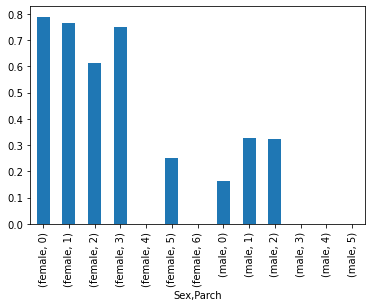

In [89]:
df_train.groupby(['Sex','Parch'])['Survived'].mean().plot(kind='bar');

> some of the females with children survived but most of the survivals were among the single females, and then single males, with less chances for male parents with more than 2 children

<a id='ml'></a>
## Classification Models

- Transform ordinal variables and categorical variables into scaled values and encode using LabelEncoder, OrdinalEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [12]:
# initiating label encoder instance to transform Sex and Embarked
le = LabelEncoder()

In [13]:
# Encoding embarked column
cols = ['Embarked']
for col in cols:
    df_train_c[col]= le.fit_transform(df_train_c[col])

In [14]:
#encoding sex column 
df_train_c['Sex']= pd.get_dummies(df_train_c['Sex'], prefix=['male','female'])

In [15]:
#renaming Sex column as is_female because they were among the most survivals 
df_train_c.rename(columns={'Sex': 'is_female'}, inplace=True)

In [16]:
#check
df_train_c.describe()

,Survived,Pclass,is_female,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [17]:
X = df_train_c.drop('Survived', axis=1)
y = df_train_c.Survived

#### Training the data 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state = 42, stratify=y)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [26]:
s= StandardScaler()

In [27]:
best_estimator = Pipeline([("poly_feat", PolynomialFeatures()),
                          ('scaler',s),
                          ("lr", LogisticRegressionCV(Cs=10, cv=4, penalty='l2',
                                                      solver='liblinear'))])
params = {'poly_feat__degree': [1,2,3]}
grid = GridSearchCV(best_estimator, params)
grid.fit(X_train, y_train)

C:\Users\Amira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Amira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Amira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Amira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegressionCV(cv=4,
                                                             solver='liblinear'))]),
             param_grid={'poly_feat__degree': [1, 2, 3]})

In [28]:
grid.best_estimator_

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('lr', LogisticRegressionCV(cv=4, solver='liblinear'))])

In [29]:
y_predict = grid.predict(X_test)
precision, recall, fscore, _ = score(y_test, y_predict, average='weighted')
print(precision, recall, fscore)
print(classification_report(y_test, y_predict))

0.8114012095036899 0.8123249299719888 0.8088106385369646
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       220
           1       0.80      0.68      0.74       137

    accuracy                           0.81       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.81      0.81      0.81       357



In [30]:
roc_auc_score(y_test, y_predict)

0.7871433311214333

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [41]:
#trying minmax scaler on the features dataset
X = mm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=21)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('f1 score: ', round(f1_score(y_test, y_pred),2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       220
           1       0.91      0.61      0.73       137

    accuracy                           0.83       357
   macro avg       0.85      0.78      0.80       357
weighted avg       0.84      0.83      0.82       357

Accuracy score:  0.83
f1 score:  0.73


In [36]:
max_k = 40
f1_scores = []
error_rates =[]

for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1     = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred),4)))
    error = 1- round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_result = pd.DataFrame(f1_scores, columns=['k', 'f1_score'])
error_df  = pd.DataFrame(error_rates, columns=['k','error_rate'])


In [37]:
f1_result # 21 K neighbors have the best results

,k,f1_score
0,1,0.6615
1,2,0.6667
2,3,0.7072
3,4,0.7126
4,5,0.7181
5,6,0.7259
6,7,0.7132
7,8,0.7294
8,9,0.7266
9,10,0.7323


#### SVM

In [49]:
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [54]:
best_estimator = Pipeline([("poly_feat", PolynomialFeatures()),
                          ("svm", SVC(**kwargs))])
params = {'poly_feat__degree': [1,2,3]}
grid = GridSearchCV(best_estimator, params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                                       ('svm', SVC())]),
             param_grid={'poly_feat__degree': [1, 2, 3]})

In [55]:
grid.best_estimator_

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)), ('svm', SVC())])

In [56]:
y_predict = grid.predict(X_test)
precision, recall, fscore, _ = score(y_test, y_predict, average='weighted')
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       220
           1       0.93      0.59      0.72       137

    accuracy                           0.83       357
   macro avg       0.86      0.78      0.80       357
weighted avg       0.85      0.83      0.82       357



In [57]:
# Nystroem Method for Kernel Approximation  
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

SGDClassifier()

In [58]:
y_pred = sgd.predict(X_transformed)

In [60]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.83      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



#### Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [87]:
feature_cols = [x for x in df_train_c.columns if x not in 'Survived']
X = df_train_c[feature_cols]
y = df_train_c.Survived

In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
dt.tree_.node_count, dt.tree_.max_depth

(261, 16)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.940075,0.767507
precision,0.972678,0.721311
recall,0.868293,0.642336
f1,0.917526,0.679537


In [43]:
#Using Gridsearch CV
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [44]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(39, 5)

In [45]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

,train,test
accuracy,0.850187,0.789916
precision,0.883436,0.836957
recall,0.702439,0.562044
f1,0.782609,0.672489


#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\Amira\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Amira\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


,oob
n_trees,
15.0,0.226592
20.0,0.219101
30.0,0.219101
40.0,0.219101
50.0,0.217228
100.0,0.213483
150.0,0.207865
200.0,0.205993
300.0,0.200375


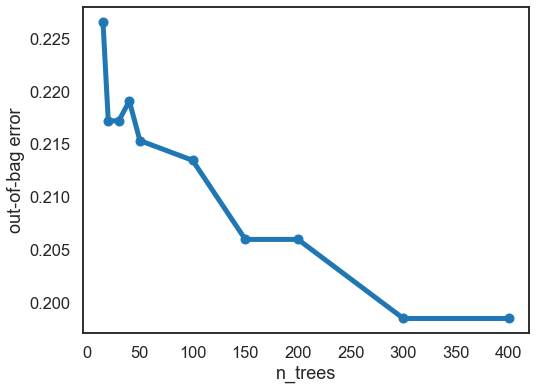

In [54]:
sb.set_context('talk')
sb.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(8, 6), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [47]:
# Random forest with 30 estimators
model = RF.set_params(n_estimators=400)
y_pred = model.predict(X_test)

In [48]:
#printing scores for Random forest model
cr = classification_report(y_test, y_pred)
print(cr)
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       220
           1       0.75      0.69      0.72       137

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.80      0.79       357

   accuracy  precision    recall        f1       auc
0  0.795518   0.753968  0.693431  0.722433  0.776261


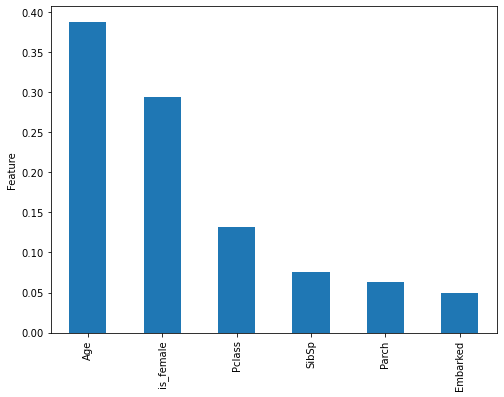

In [49]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(8, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

#### Trying Stratified Shuffle split:

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df_train_c.drop('Survived', axis=1)
y = df_train_c.Survived
X = np.array(X)

In [66]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

In [67]:
for train_index, test_index in strat_shuff_split.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [70]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
RF.set_params(n_estimators=400)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=42, warm_start=True)

In [71]:
y_pred = RF.predict(X_test)

In [73]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       220
           1       0.75      0.69      0.72       137

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.80      0.79       357



### Boosting and stacking

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=400, random_state=42)

GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [75]:
error = 1.0 - accuracy_score(y_test, y_pred)
error

0.19327731092436973

In [76]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(n_estimators=400, random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [77]:
GV_GBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features=4, n_estimators=400,
                           random_state=42)

In [78]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       243
           1       0.66      0.80      0.73       114

    accuracy                           0.81       357
   macro avg       0.78      0.80      0.79       357
weighted avg       0.82      0.81      0.81       357



<AxesSubplot:>

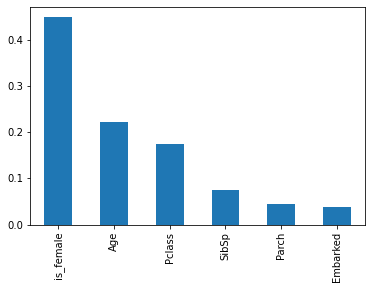

In [61]:
model2_feat_imp =pd.Series(GV_GBC.best_estimator_.feature_importances_, 
                           index=feature_cols).sort_values(ascending = False).plot(kind='bar')
model2_feat_imp

In [89]:
LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)
y_pred = LR_L2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       239
           1       0.69      0.80      0.74       118

    accuracy                           0.81       357
   macro avg       0.79      0.81      0.80       357
weighted avg       0.82      0.81      0.82       357



C:\Users\Amira\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [81]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

C:\Users\Amira\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [82]:
y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       220
           1       0.86      0.66      0.75       137

    accuracy                           0.83       357
   macro avg       0.84      0.80      0.81       357
weighted avg       0.83      0.83      0.82       357



#### XGBoost Model

In [83]:
from xgboost import XGBClassifier

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify =y)
# fit model to training data
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=400, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)


C:\Users\Amira\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
# evaluate predictions
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       220
           1       0.76      0.69      0.72       137

    accuracy                           0.80       357
   macro avg       0.79      0.77      0.78       357
weighted avg       0.79      0.80      0.79       357



<AxesSubplot:>

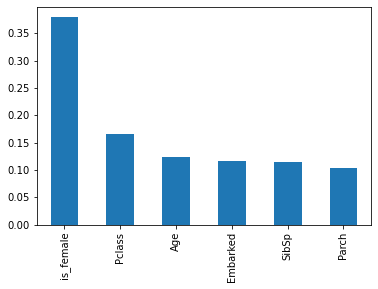

In [88]:
pd.Series(model.feature_importances_, 
                           index=feature_cols).sort_values(ascending = False).plot(kind='bar')

<a id='conclusions'></a>
## Conclusions

> EDA Findings:
- More than 55% of passengers on the ship were of young age (<40 years old), the age variable has outliers (80)and is skewed to the right.
- Most Survivals are among the females of 74% and 19% for males
- The Train Data set only contains a portion of the data, only 722 survived out of 2224 (~33 % Survival rate)
- Most of the passengers are males, the dominant Pclass among passengers were from 3rd class, then 2nd and 1st class, Southampton is most common port of Embarkation.
- Most of the passengers were singles not a parent or children.
- Fare, Pclass vs Survived have a moderate +ve relationship shown from seaborn heatmap.
- Survived passengers are from the young age, who mostly embarked from Cherbourg, then Southampton, Young Passengers from the 1st class were the most survivals, then 2nd class and lastly the 3rd class
- Parents with one or more child were more likely to survive, some of the females with children survived but most of the survivals were among the single females, and then single males, with less chances for male parents with more than 2 children


> Summary Key Findings and Insights from the models: 
-	Main Driver for the model is to predict the survived passengers of the Titanic.
-	Feature Importance was 1st the gender of the passenger, Age and their Ticket Class.
-	This dataset had imbalanced classification classes where the +ve class (Survived ) were the minority.
-	Most  models used did not recall the minority class efficiently, due to the distorted data as I think.
-	Best Model in my opinion was Gradient Boosting Classifier with grid search CV. Due to its high recall and weighted F1 score. 


> Limitations and suggestions for a better model:
-	Imputing the Age column( had 177 missing values) with the median is not the best solution, other suggestions include using SKlearn KNN imputer, or a sophisticated imputer as  IterativeImputer.

-	Title column as I found out after reading other Data Scientist’s posts of the same data set is a particularly important feature, so it’s suggested to revisit the data set and parse the title column into unique values to be further encoded and fitted into the model.